# Proyecto 1: Analisis de sentimientos de peliculas

### Importacion de librerias necesarias

In [1]:
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# Descargando las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/estebangonzalezruales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/estebangonzalezruales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Función para tokenizar los reviews
def tokenizer(text):
    return word_tokenize(text)

### Carga de datos

In [5]:
df = pd.read_csv("./data/MovieReviews.csv", index_col=0)

In [6]:
df.shape

(5000, 2)

In [7]:
df.sample(5)

,review_es,sentimiento
4414,"Un mejor contendiente para la peor película jamás hecha.El personaje de Joanna Pakula parece tener un i.Q.de 3 que es solo uno menos que el escritor y director.El guión no habría pasado en una clase de escritura de la escuela secundaria;Los ""chistes"" son juveniles;El concepto Corny.Estos artistas eran obviamente desesperados por el trabajo.Me alojé hasta el final solo para ver si empeoraría.Lo hizo.La vida es demasiado corta para pasar cualquier parte de ver esta película.",negativo
193,"""Viaje al otro lado del Sol"" (también conocido como ""Doppelganger"") es un entretenido, ofrenda de ciencia ficción de estilo de Zona Twilight de Gerry y Sylvia Anderson (el equipo detrás del espacio: 1999, OVNI, Thunderbirds, Fireball XL-5 y otros). En la película, Roy Thinnes (del programa de televisión ""invasores"" y la estrella de Ian Hendry como astronautas enviadas en un vuelo a un planeta que comparte una órbita exacta de la tierra, pero en el lado opuesto del sol; por lo tanto, previamente oculto a la vista. Un director de vuelo espacial europeo agotado (sobre el difunto patrick Wymark) obtiene el vuelo rápido y después de un entrenamiento riguroso, los astronautas son buenos para ir. Así comienza las mejores secuencias en la película, el lanzamiento, el vuelo y el aterrizaje en la ""otra"" tierra. El deslumbrante trabajo en miniatura de cohetes (por Derek Meddings) y un espacio de ensueño, elegante espacio espacial (un tanto recuercente de los mejores momentos de ""2001: A Space Odyssey"") son mejores destacados de la película. El aterrizaje en la tierra ""Doppelganger"" es emocionante y extraño. Después de esto, el aspecto de la zona crepuscular de la película entra; Con una parcela levantada casi todo del episodio clásico de TZ, ""El paralelo"". Aparte de eso, la película sigue siendo ciencia ficción sólida, con algunas cosas intrigantes ""Mundo del Mundo"" para masticar (escritura al revés y apretones de manos zurdos, por ejemplo). Menos exitosos son las escenas que representan una Tierra de mediados del siglo XXI; Donde todos los hombres llevan cuellos de cuello alto y chaquetas de Nehru y todas las mujeres usan mini faldas. Algunas de las relaciones con las mujeres en la película también son ""no PC"" por las normas de hoy. Y (en la falla más consistente de la mayoría de la ciencia ficción del siglo XX), las computadoras, los teléfonos y otros hardware son grandes, coloridos y clunky (justo al lado del ""prisionero"" de Patrick McGoohan). ¡Nadie previó la edad de microprocesador digital! Si uno puede aceptar estas fallas en la previsión, la película es muy interesante, con un rendimiento de plomo sólido de Thinnes como el astronauta con problemas. ¡Y con un buen final de la década de 1960 / a principios de los años 70! Para los fanáticos de la ciencia ficción retro (como yo) ¡Este es un ""viaje"" que vale la pena tomar!",positivo
422,"Freddy ha pasado de miedo a divertido, en esta 6ª cuota en la serie Nightmare.Han pasado 2 años, bien, en realidad, 11 desde que se produce esta película en 2001.Y Freddy ha matado a cada último niño en Elm Street, excepto uno, John Doe (Jacobb desde la Parte 5, incluso Doe, la película da por sugerencia, enLo que usa para llevar a más hijos a venir a Elm Street. No solo Freddy recibe sus deseos, pero también recupera a su hija a Elm Street. Cuando descubre lo que está sucediendo, ella y otros niños deciden matar a Freddy una vez yPara todos. También podemos ver algunos de los antecedentes de Freddy.Rachel Talalay, quien ha sido contendiente a la serie Nightmare durante mucho tiempo. Muchas personas odian esta película, pero me gustó. Trató de sacar lo que Freddy estaba haciendo con sus Wisecrackes ... Comdey y hace que la serie másDivertido que Scary.So Esta película es realmente una llena de comdey para hablar. No es la versión de bienvenida en la serie, la Parte 2 aún lo sostiene.",positivo
2122,"Los actores intensos como Bruce Sern, Jason Patrick y Rachel Ward s

In [8]:
df["sentimiento"].value_counts(dropna=False, normalize=True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

### Dividir los reviews en conjuntos de entrenamiento y prueba

En este apartado estamos dividiendo las entradas de datos en dos subconjuntos, uno de entrenamiento y el otro de prueba. Como estamos utilizando machine learning supervisado, esto quiere decir que con un conjunto de datos vamos a entrenar a nuestro modelo, mediante las etiquetas que ciertos valores deberían tener. Luego, con el conjunto de prueba vamos a probar si nuestro modelo etiqueta correctamente un conjunto del cual no conoce la etiqueta, y lo evaluamos con las métricas de error pertinentes.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df["review_es"], df["sentimiento"], test_size = 0.2, stratify = df["sentimiento"], random_state = 1)

In [10]:
X_train.shape

(4000,)

In [11]:
pd.Series(y_train).value_counts(normalize=True)

negativo    0.5
positivo    0.5
Name: sentimiento, dtype: float64

In [12]:
X_test.shape

(1000,)

In [13]:
pd.Series(y_test).value_counts(normalize=True)

negativo    0.5
positivo    0.5
Name: sentimiento, dtype: float64

### Vectorizando los reviews

En este apartado lo que estamos haciendo es convertir las palabras en un vector, para poder luego aplicar el algoritmo de clasificación. Esto tiene relevancia porque la entrada del algoritmo tiene que ser si o si un vector, o datos numéricos.

In [14]:
bow = CountVectorizer(tokenizer=tokenizer, stop_words=list(stop_words), lowercase=True)

In [15]:
X_bow = bow.fit_transform(X_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
len(bow.vocabulary_)

62967

In [17]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words=list(stop_words), lowercase=True)

In [18]:
X_tfidf = tfidf.fit_transform(X_train)

In [19]:
len(tfidf.vocabulary_)

62967

### Entrenando y evaluando un modelo Random Forest Classifier Bow
##### Modelo entrenado por: Juan Diego Yepes

Este modelo implementa Random Forest Classifier con un vector de tipo Bow, para la muestra de 5000 reseñas. Lo que hace el algoritmo, teniendo las palabras en un vector, es que conforma un árbol de decisión donde le da importancia a ciertos valores, en este caso palabras, para determinar si el sentimiento es positivo o negativo.

In [20]:
bow_model = RandomForestClassifier(random_state = 2)

In [21]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

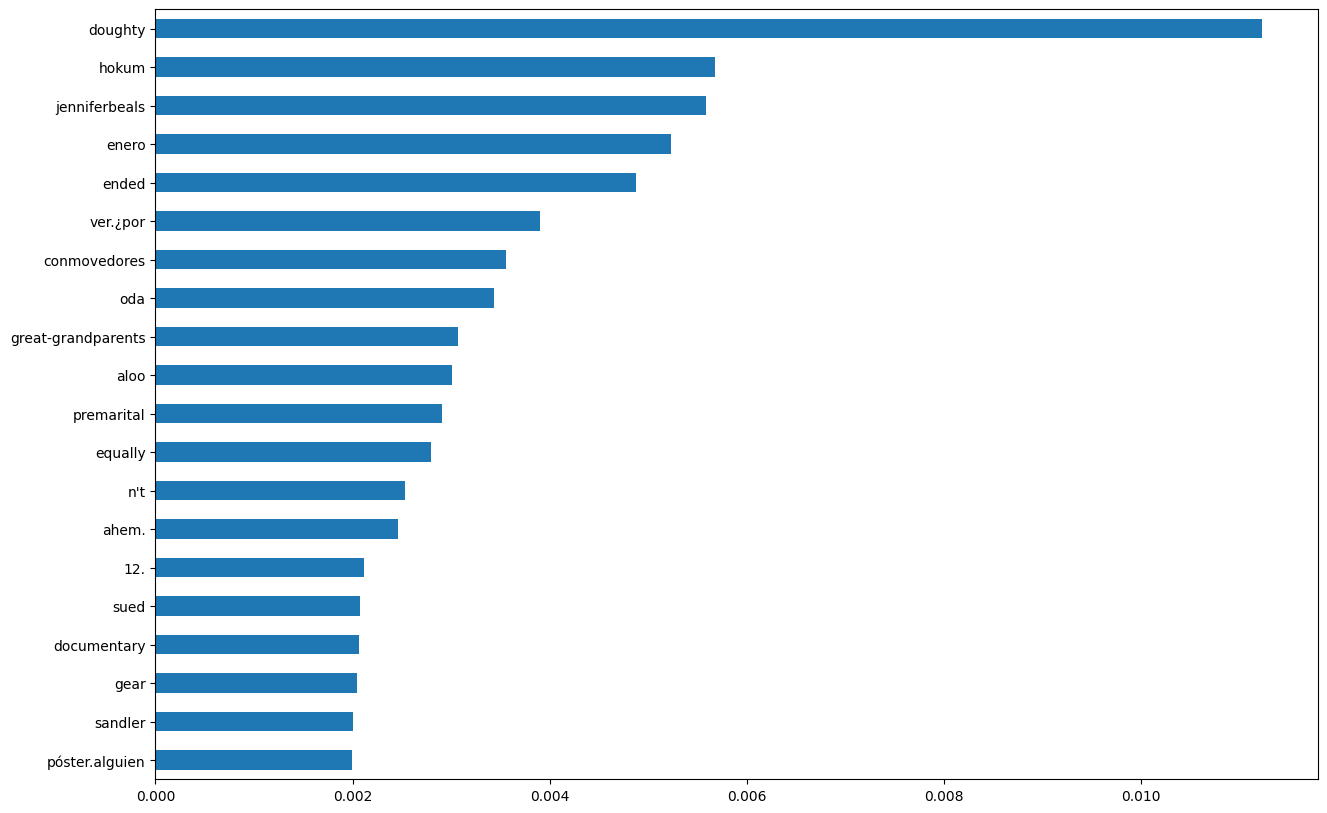

In [22]:
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [23]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 190.92


In [24]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

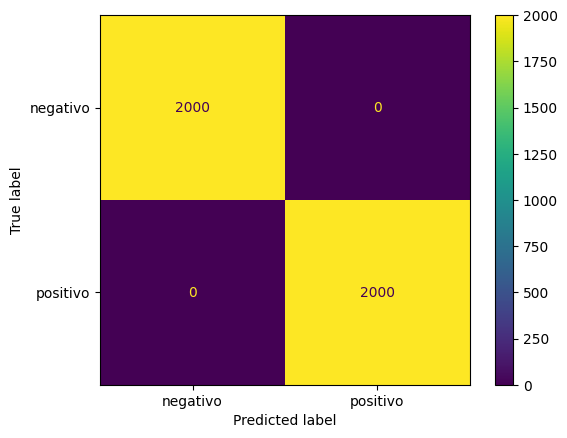

In [25]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

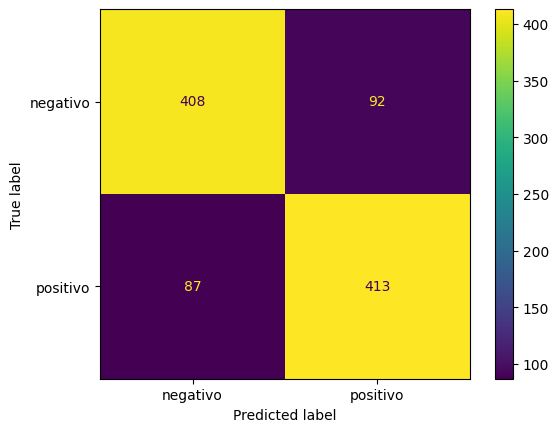

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [27]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_bow_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_train, y_train_bow_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_train, y_train_bow_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_bow_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_bow_predict, average = None))
    print('F1:', f1_score(y_train, y_train_bow_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [28]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
    print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: 0.8178217821782178
Recall: 0.826
F1: 0.8218905472636815


##### Conclusiones

Podemos ver que el algoritmo tiene un 81% de presición, 82,6% de recall y 82% de F1. Esto nos está indicando varias cosas. En primer lugar, la presición es adecuada, y nos indica que no hay mucho sobreajuste de los datos, lo que es bueno, porque nos indica que el modelo está en capacidad de predecir con datos que no conoce y no se ajusta o tiene un "bias" por los datos que se le pasaron de entrenamiento. De igual forma el recall, es de 0.826, lo que indica que de todos los casos positivos que realmente existen, el modelo identificó correctamente el 82,6%. La medida F1 combina tanto la precisión como el recall, y es una medida que combina ambas métricas en una sola. El valor F1 del modelo es de 0.821, lo que indica que el modelo tiene un equilibrio entre precisión y recall.

En general, podemos concluir que el modelo tiene un buen rendimiento en la tarea de clasificación y puede ser utilizado en aplicaciones prácticas. 

### Entrenando y evaluando con Random Forest Classifier TFIDF
##### Modelo entrenado por: Esteban Gonzalez Ruales

In [29]:
tfidf_model = RandomForestClassifier(random_state = 3)

In [30]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

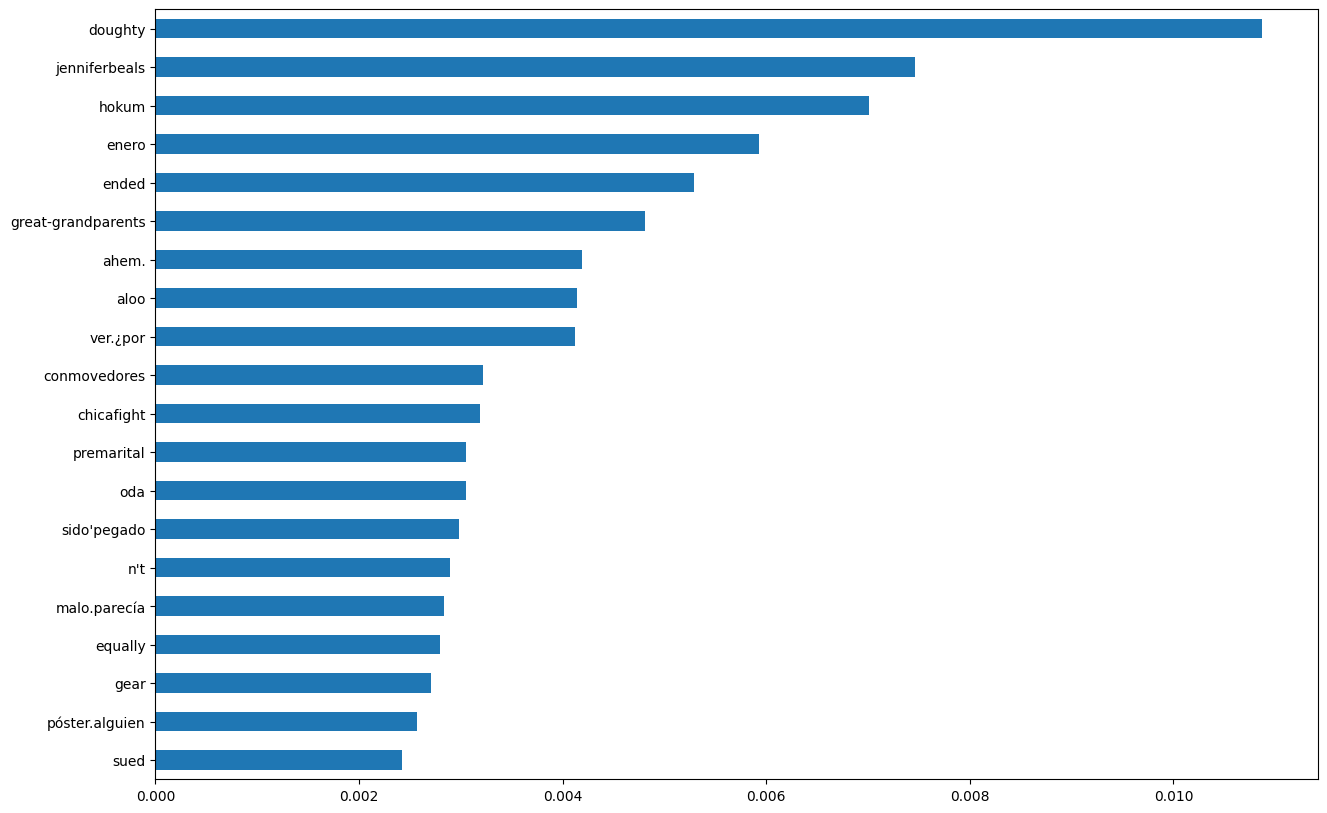

In [31]:
pd.Series(tfidf_model.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [32]:
tfidf_estimators = tfidf_model.estimators_
print('Number of trees:', len(tfidf_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 169.51


In [33]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

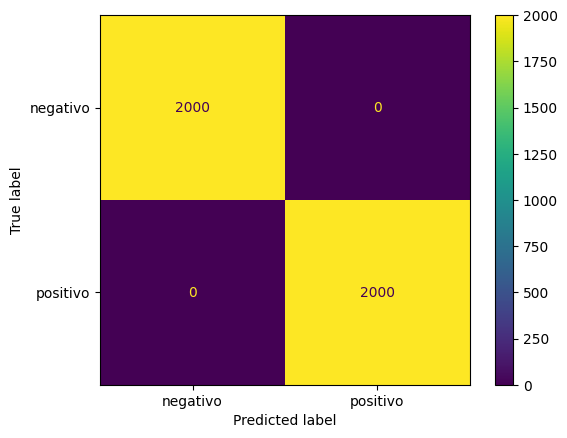

In [34]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

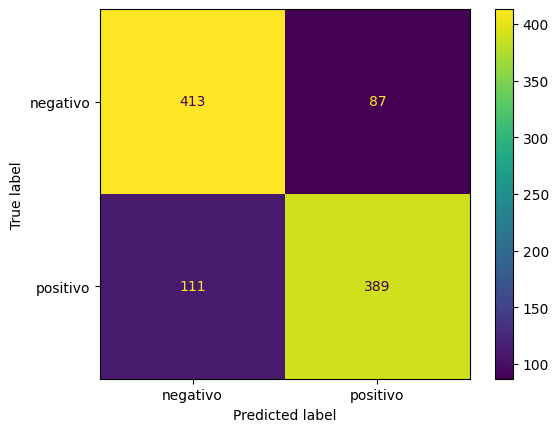

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [36]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_tfidf_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_train, y_train_tfidf_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_train, y_train_tfidf_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_tfidf_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_tfidf_predict, average = None))
    print('F1:', f1_score(y_train, y_train_tfidf_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [37]:
if len(tfidf_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: 0.8172268907563025
Recall: 0.778
F1: 0.7971311475409837


### Entrenando y evaluando un modelo usado Naive Bayes
##### Modelo entrenado por: Esteban Gonzalez Ruales

In [38]:
nb_model = MultinomialNB()

In [39]:
nb_model.fit(X_tfidf, y_train)

MultinomialNB()

In [40]:
feature_importances = np.exp(nb_model.feature_log_prob_)[1,:] - np.exp(nb_model.feature_log_prob_)[0,:]

<Axes: >

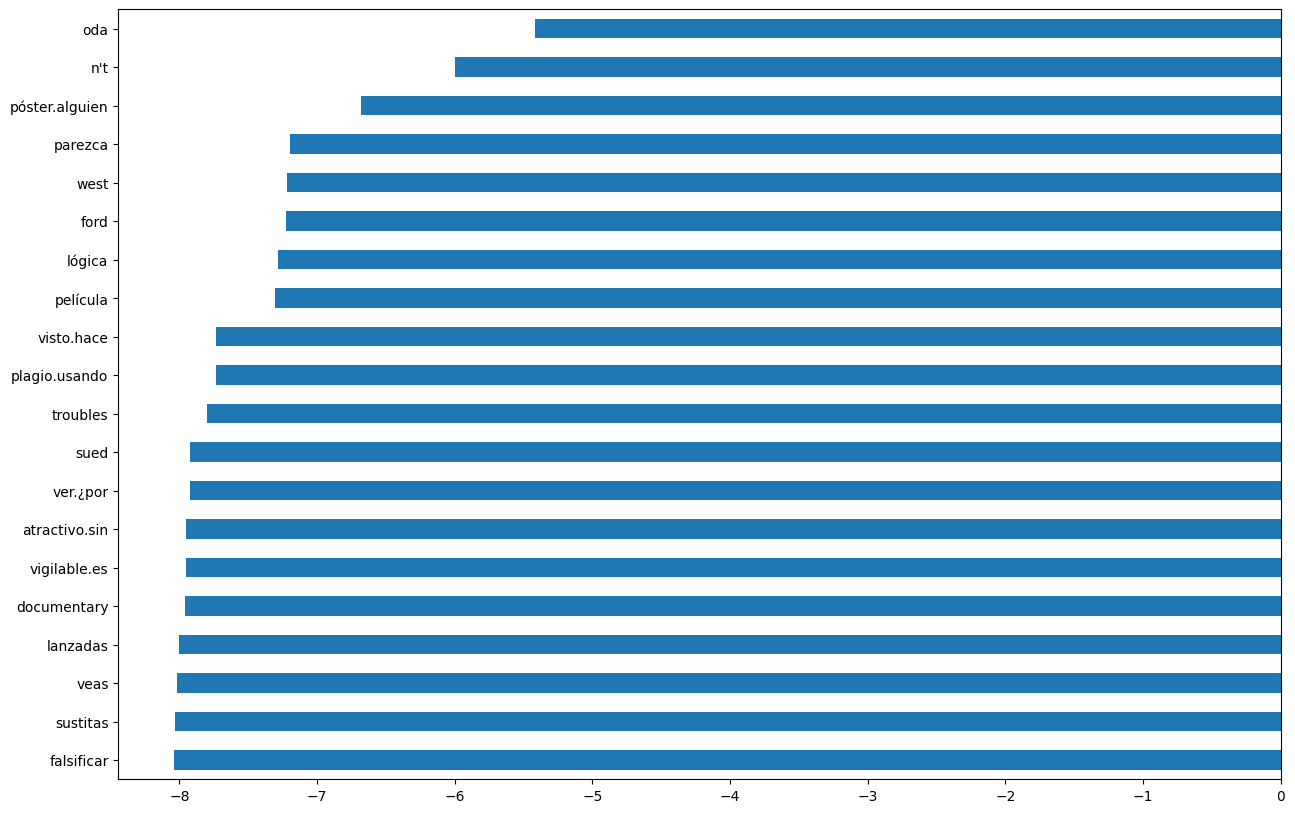

In [41]:
pd.Series(nb_model.feature_log_prob_[1], index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [42]:
y_train_nb_predict = nb_model.predict(X_tfidf)
y_test_nb_predict = nb_model.predict(tfidf.transform(X_test))

In [43]:
print('Number of classes:', len(nb_model.classes_))
print('Class labels:', nb_model.classes_)
print('Number of features:', len(nb_model.feature_log_prob_[0]))
print('Number of non-zero features:', np.count_nonzero(nb_model.feature_log_prob_))
print('Prior probabilities:', nb_model.class_log_prior_)
print('Feature log probabilities:', nb_model.feature_log_prob_)

Number of classes: 2
Class labels: ['negativo' 'positivo']
Number of features: 62967
Number of non-zero features: 125934
Prior probabilities: [-0.69314718 -0.69314718]
Feature log probabilities: [[ -7.29513013 -10.07539535  -9.34390838 ... -10.87070066 -11.2071474
  -11.29277922]
 [ -7.30441399 -10.48796136 -10.23040853 ... -10.80728294 -11.2924649
  -11.1652035 ]]


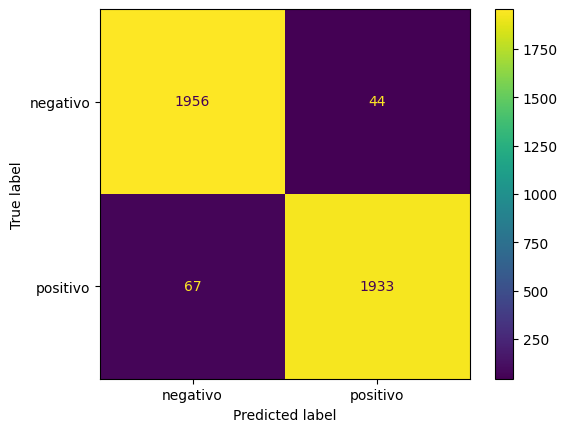

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nb_predict)

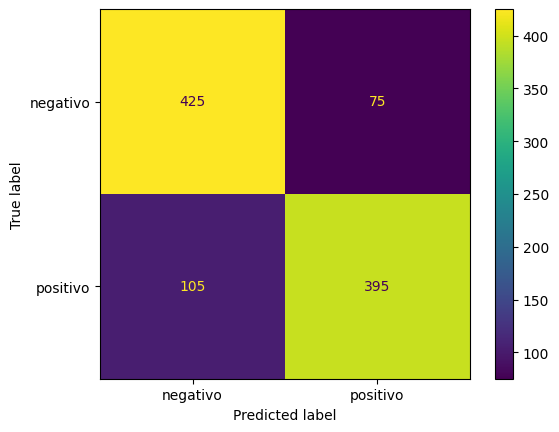

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nb_predict)

In [46]:
if len(nb_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_nb_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_train, y_train_nb_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_train, y_train_nb_predict, pos_label = 'positivo'))
else:
    print('Precision:', precision_score(y_train, y_train_nb_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_nb_predict, average = None))
    print('F1:', f1_score(y_train, y_train_nb_predict, average = None))

Precision: 0.9777440566514921
Recall: 0.9665
F1: 0.97208951470958


In [47]:
if len(nb_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_nb_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_test, y_test_nb_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_test, y_test_nb_predict, pos_label = 'positivo'))
else:
    print('Precision:', precision_score(y_test, y_test_nb_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_nb_predict, average = None))
    print('F1:', f1_score(y_test, y_test_nb_predict, average = None))

Precision: 0.8404255319148937
Recall: 0.79
F1: 0.8144329896907218


### Entrenando y evaluando un modelo usado KNN
##### Modelo entrenado por: Mariana Diaz Mareas

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn_model.fit(X_tfidf, y_train)

KNeighborsClassifier()

In [50]:
plt.figure(figsize=(15,10))
feature_importances = knn_model.feature_importances_
sorted_idx = feature_importances.argsort()[-20:]
plt.barh(np.array(tfidf.get_feature_names())[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

<Figure size 1500x1000 with 0 Axes>